# **Medical Readmission**
## Model Description
The model is designed to predict the risk of readmission for patients after they are discharged from the hospital. It is a binary classification model that classifies patients as either likely to be readmitted (1) or not (0). The model uses a neural network architecture implemented using TensorFlow.

In [25]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import chi2
import seaborn as sns
import matplotlib.pyplot as plt



# Load your dataset
data = pd.read_csv('/content/diabetic_data.csv')

## Data Preprocessing

*  Handling missing values by dropping columns with a high number of missing values and rows with critical missing values.
*  Mapping 'readmitted' values to binary (1 for readmitted within 30 days, 0 otherwise).
* Selecting relevant features and encoding categorical features.

In [26]:
# Check the shape of the dataset
data.shape

(101766, 50)

In [27]:
# Check the data types of each column
data.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [28]:
# Check for missing values in object type columns
for col in data.columns:
    if data[col].dtype == object:
         print(col,data[col][data[col] == '?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [29]:
# Check for missing values in the 'gender' column
print('gender', data['gender'][data['gender'] == 'Unknown/Invalid'].count())

gender 3


In [30]:
# Drop columns with a high number of missing values
data = data.drop(['weight','payer_code','medical_specialty'], axis = 1)

In [31]:
# Identify and drop rows with missing values in critical columns
drop_Idx = set(data[(data['diag_1'] == '?') & (data['diag_2'] == '?') & (data['diag_3'] == '?')].index)
drop_Idx = drop_Idx.union(set(data['diag_1'][data['diag_1'] == '?'].index))
drop_Idx = drop_Idx.union(set(data['diag_2'][data['diag_2'] == '?'].index))
drop_Idx = drop_Idx.union(set(data['diag_3'][data['diag_3'] == '?'].index))
drop_Idx = drop_Idx.union(set(data['race'][data['race'] == '?'].index))
drop_Idx = drop_Idx.union(set(data[data['discharge_disposition_id'] == 11].index))
drop_Idx = drop_Idx.union(set(data['gender'][data['gender'] == 'Unknown/Invalid'].index))
new_Idx = list(set(data.index) - set(drop_Idx))
data = data.iloc[new_Idx]

In [32]:
data = data.drop(['citoglipton', 'examide'], axis = 1)
#Checking for missing values in the data
for col in data.columns:
    if data[col].dtype == object:
         print(col,data[col][data[col] == '?'].count())

print('gender', data['gender'][data['gender'] == 'Unknown/Invalid'].count())

race 0
gender 0
age 0
diag_1 0
diag_2 0
diag_3 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0
gender 0


In [33]:
# Map 'readmitted' values to binary (1 for readmitted within 30 days, 0 otherwise)
data['readmitted'] = data['readmitted'].apply(lambda x: 0 if x in [">30", "NO"] else 1)

<ipython-input-34-514a7e29d6c7>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='age', y='readmitted', ci=None)


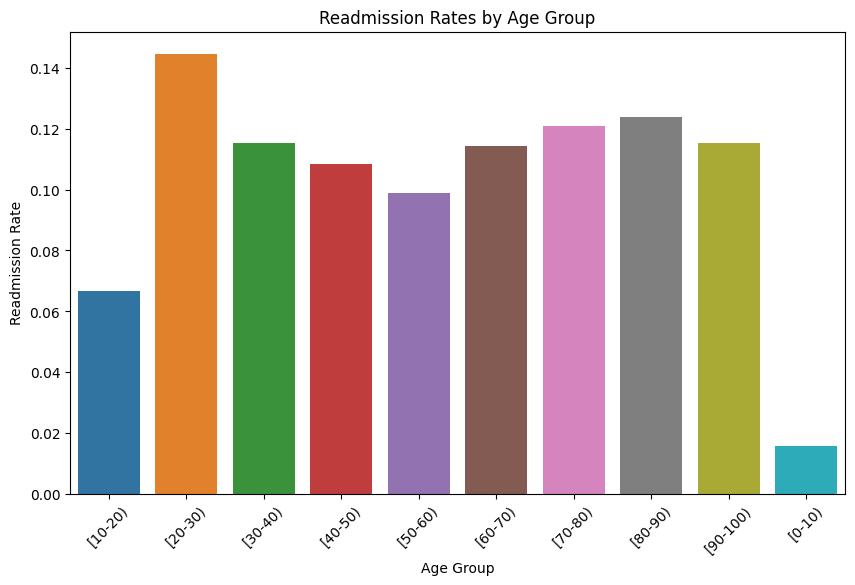

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='age', y='readmitted', ci=None)
plt.title('Readmission Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Readmission Rate')
plt.xticks(rotation=45)
plt.show()

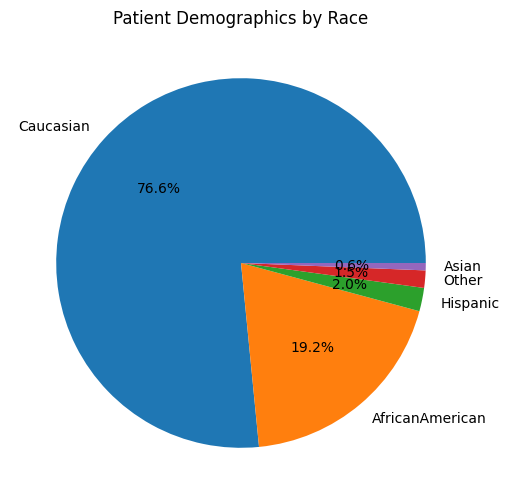

In [35]:
plt.figure(figsize=(6, 6))
data['race'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Patient Demographics by Race')
plt.ylabel('')  # Remove the 'race' label
plt.show()

<ipython-input-36-0220ce17e53f>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='race', y='readmitted', ci=None)


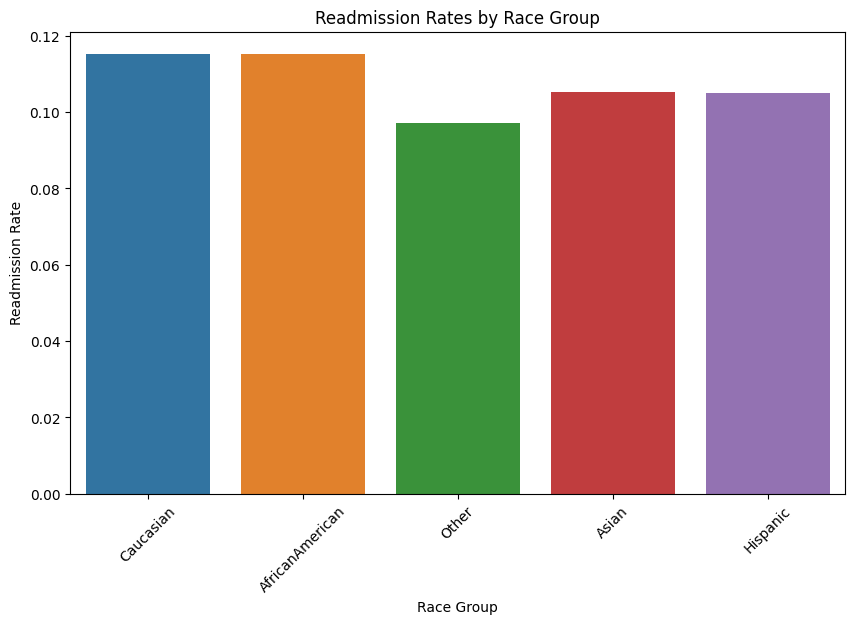

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='race', y='readmitted', ci=None)
plt.title('Readmission Rates by Race Group')
plt.xlabel('Race Group')
plt.ylabel('Readmission Rate')
plt.xticks(rotation=45)
plt.show()

In [37]:
# Select features and target variable
selected_features = ["race", "gender", "age", "admission_type_id", "discharge_disposition_id",
                     "admission_source_id", "time_in_hospital",
                     "num_lab_procedures", "num_procedures", "num_medications", "number_outpatient",
                     "number_emergency", "number_inpatient", "diag_1", "diag_2", "diag_3",
                     "number_diagnoses", "max_glu_serum", "A1Cresult", "metformin", "repaglinide",
                     "nateglinide", "chlorpropamide", "glimepiride", "acetohexamide", "glipizide",
                     "glyburide", "tolbutamide", "pioglitazone", "rosiglitazone", "acarbose",
                     "miglitol", "troglitazone", "tolazamide", "insulin",
                     "glyburide-metformin", "glipizide-metformin", "glimepiride-pioglitazone",
                     "metformin-rosiglitazone", "metformin-pioglitazone", "change", "diabetesMed"]

X = data[selected_features]
y = data['readmitted']

# Encoding Categorical Features
categorical_features = ['race', 'gender', 'age', 'diag_1',
                        'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide',
                        'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
                        'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
                        'miglitol', 'troglitazone', 'tolazamide', 'insulin',
                        'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
                        'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']


for feature in categorical_features:
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


<ipython-input-37-d97350c3a005>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = le.fit_transform(X[feature])
<ipython-input-37-d97350c3a005>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = le.fit_transform(X[feature])
<ipython-input-37-d97350c3a005>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

## Model Architecture
The model is implemented as a neural network with the following layers:

**Input Layer**: The input layer has a shape matching the number of features in the preprocessed dataset. Each feature is a numerical representation of categorical variables that were encoded during data preprocessing.

**Dense Layer 1**: The first dense layer consists of 64 neurons and uses the ReLU (Rectified Linear Unit) activation function. It is responsible for learning complex patterns and relationships in the data. ReLU is chosen as the activation function because it introduces non-linearity into the model, allowing it to model complex, non-linear relationships.

**Dense Layer 2**: The second dense layer consists of 32 neurons with ReLU activation. This layer further extracts and learns relevant features from the data.

**Output Layer**: The output layer has a single neuron with a sigmoid activation function. It performs binary classification, predicting whether a patient is likely to be readmitted (1) or not (0). The sigmoid activation function squashes the model's output between 0 and 1, making it suitable for binary classification.

### Loss Function
The model uses binary cross-entropy loss for training. Binary cross-entropy is a common choice for binary classification tasks and measures the dissimilarity between the predicted probabilities and the actual binary labels.

### Optimization Algorithm
The Adam optimizer is employed for training the model. Adam is an adaptive learning rate optimization algorithm that effectively balances the benefits of both AdaGrad and RMSProp. It adjusts the learning rate during training to converge faster and more efficiently.

In [38]:
# Build and train the model using TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Training Procedure
The model is trained for a total of 10 epochs, meaning it processes the entire training dataset 10 times. The training data is divided into batches of 32 samples, and the model updates its weights after processing each batch. This mini-batch gradient descent helps the model converge efficiently.

## Evaluation
The model's performance is evaluated using a separate test dataset. Two main metrics are reported:\
**Test Loss**: The binary cross-entropy loss on the test dataset measures the model's ability to predict the likelihood of readmission accurately. Lower test loss indicates better model performance.

**Test Accuracy**: Test accuracy is the proportion of correctly predicted instances in the test dataset. It represents the model's ability to make accurate predictions and is an essential measure of its performance.

In [39]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Epoch 1/10
2412/2412 [==============================] - 6s 2ms/step - loss: 0.3484 - accuracy: 0.8855
Epoch 2/10
2412/2412 [==============================] - 5s 2ms/step - loss: 0.3410 - accuracy: 0.8858
Epoch 3/10
2412/2412 [==============================] - 5s 2ms/step - loss: 0.3393 - accuracy: 0.8857
Epoch 4/10
2412/2412 [==============================] - 5s 2ms/step - loss: 0.3379 - accuracy: 0.8860
Epoch 5/10
2412/2412 [==============================] - 6s 2ms/step - loss: 0.3371 - accuracy: 0.8860
Epoch 6/10
2412/2412 [==============================] - 5s 2ms/step - loss: 0.3359 - accuracy: 0.8862
Epoch 7/10
2412/2412 [==============================] - 5s 2ms/step - loss: 0.3348 - accuracy: 0.8863
Epoch 8/10
2412/2412 [==============================] - 5s 2ms/step - loss: 0.3337 - accuracy: 0.8866
Epoch 9/10
2412/2412 [==============================] - 5s 2ms/step - loss: 0.3327 - accuracy: 0.8866
Epoch 10/10
603/603 [==============================] - 1s 2ms/step - loss: 0.3506 

603/603 [==============================] - 1s 1ms/step


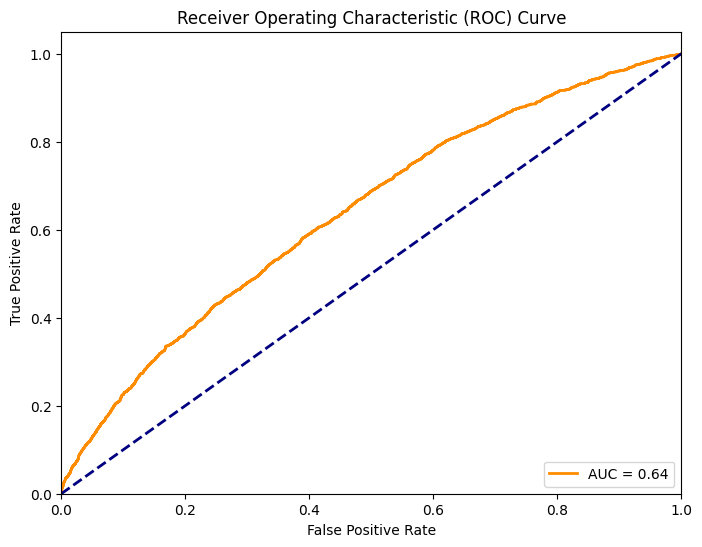

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test, model.predict(X_test))
auc = roc_auc_score(y_test, model.predict(X_test))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Application Integration
This model can be integrated into healthcare applications to predict the risk of readmission for patients after hospital discharge. Healthcare providers can use these predictions to prioritize high-risk patients for post-discharge interventions, potentially reducing readmissions and improving patient care. The model's results can be seamlessly integrated into healthcare workflows and electronic health records systems.




